## Transfer .wav file into audio image

/var/folders/_s/9nzxclr16t92zrj4324310mw0000gn/T/ipykernel_98179/667254721.py:36: FutureWarning: Pass y=[-0.09606124 -0.15194137 -0.12390848 ... -0.01018168  0.03065765
  0.0789888 ], sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr)
/var/folders/_s/9nzxclr16t92zrj4324310mw0000gn/T/ipykernel_98179/667254721.py:36: FutureWarning: Pass y=[0.09835809 0.16676307 0.12242793 ... 0.04372259 0.03589967 0.02759256], sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr)
/var/folders/_s/9nzxclr16t92zrj4324310mw0000gn/T/ipykernel_98179/667254721.py:36: FutureWarning: Pass y=[0.04416407 0.05897814 0.03616486 ... 0.03101524 0.02056849 0.01229802], sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr)
/var/folders

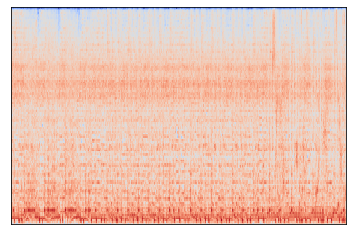

In [33]:
import os
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from pydub import AudioSegment
import librosa
import librosa.display

smooth_music_dir_path = "../wav/smooth/"
smooth_music_image_path = "../audio-image/smooth/"
smooth_mono_export_path = "../mono-wav/smooth/"

rock_music_dir_path = "../wav/rock/"
rock_music_image_path = "../audio-image/rock/"
rock_mono_export_path = "../mono-wav/rock/"

start_time = 0
end_time = 25 * 1000

# Go through smooth music
for filename in os.listdir(smooth_music_dir_path):
    if filename == ".DS_Store":
        continue

    pure_filename = filename.split(".wav")[0]
    mono_wav_file_name = smooth_mono_export_path + pure_filename + "_mono.wav"

    sound = AudioSegment.from_wav(smooth_music_dir_path + filename)
    sound = sound[start_time:end_time]
    sound = sound.set_channels(1)
    sound.export(mono_wav_file_name, format="wav")

    sample_rate, samples = wavfile.read(mono_wav_file_name)
    frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
    y, sr = librosa.load(mono_wav_file_name, sr=16000)
    S = librosa.feature.melspectrogram(y, sr)
    librosa.display.specshow(librosa.power_to_db(S))

    fig = plt.Figure()
    ax = fig.add_subplot(111)
    ax.set_axis_off()
    p = librosa.display.specshow(librosa.power_to_db(S), ax=ax)
    fig.savefig(smooth_music_image_path + pure_filename + ".png")

# Go through rock music
for filename in os.listdir(rock_music_dir_path):
    if filename == ".DS_Store":
        continue

    pure_filename = filename.split(".wav")[0]
    mono_wav_file_name = rock_mono_export_path + pure_filename + "_mono.wav"

    sound = AudioSegment.from_wav(rock_music_dir_path + filename)
    sound = sound[start_time:end_time]
    sound = sound.set_channels(1)
    sound.export(mono_wav_file_name, format="wav")

    sample_rate, samples = wavfile.read(mono_wav_file_name)
    frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
    y, sr = librosa.load(mono_wav_file_name, sr=16000)
    S = librosa.feature.melspectrogram(y, sr)
    librosa.display.specshow(librosa.power_to_db(S))

    fig = plt.Figure()
    ax = fig.add_subplot(111)
    ax.set_axis_off()
    p = librosa.display.specshow(librosa.power_to_db(S), ax=ax)
    fig.savefig(rock_music_image_path + pure_filename + ".png")
